# NLP

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [10]:
df_ = pd.read_csv('df_copom_label_pt.csv')

In [11]:
df_.head(1)

,meeting_number,date_x,date_y,selic,decision,decision_txt,type,text,num_words,text_raw,num_words_raw,label_hawk_dove,label_next_meet
0,21,1998/01/28,1998/01/28,34.5,-3.5,cortar,minutes,sumáriopreços nível atividade agregados monetá...,3926.0,\nSumárioPreços e Nível de Atividade\nAgregado...,5066.0,dovish,cortar


In [4]:
df_copom.shape

(411, 13)

In [5]:
df_sta = df_copom[(df_copom['type'] == 'statement')].copy()

In [6]:
df_sta.shape

(209, 13)

In [7]:
df_min = df_copom[(df_copom['type'] == 'minutes')].copy()

In [8]:
df_min = df_min.dropna().copy()
df_min.shape

(201, 13)

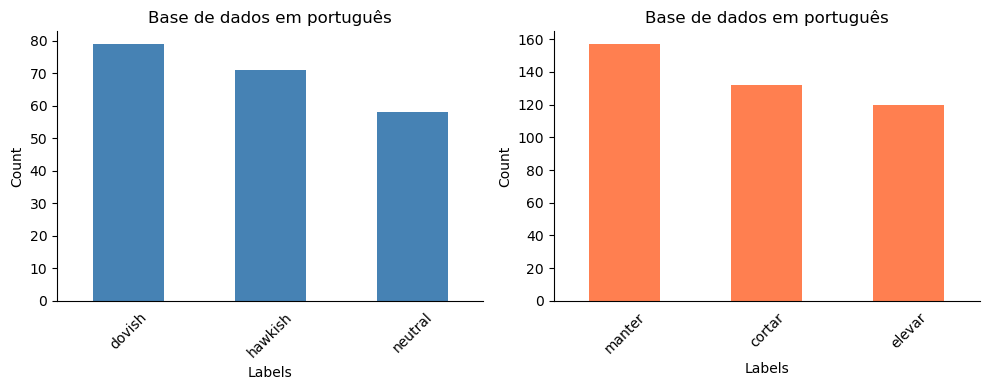

In [19]:
# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# Plotting the chart
ax = df_sta['label_hawk_dove'].value_counts().plot(kind='bar', ax=ax1, color='steelblue')

# Adding labels and title
ax1.set_xlabel('Labels')
ax1.set_ylabel('Count')
ax1.set_title('Base de dados em português')

# Adjusting the appearance
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=False, rotation=45)

# Plotting the second graph on ax2
df_['label_next_meet'].value_counts().plot(kind='bar', ax=ax2, color='coral')
ax2.set_xlabel('Labels')
ax2.set_ylabel('Count')
ax2.set_title('Base de dados em português')

# Adjusting the appearance
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='x', which='both', bottom=False, rotation=45)

# Adjusting the layout and spacing
plt.tight_layout()

# Saving the chart as an image
plt.savefig('images/categorias_pt.png')

# Displaying the chart
plt.show()

In [11]:
target_map = {'dovish': 0, 'hawkish': 1, 'neutral': 2}
df_['target'] = df_['label_hawk_dove'].map(target_map)

In [12]:
df = df_[['text', 'target']]
df.columns = ['sentence', 'label']

In [13]:
df.isnull().sum()

sentence    0
label       1
dtype: int64

In [14]:
df = df.dropna().copy()
df.shape

(208, 2)

In [15]:
df['label'] = df['label'].astype(int)

In [16]:
df.head()

,sentence,label
25,pese recentes trajetórias favoráveis taxas inf...,1
27,copom analisando eventos recentes prospectivos...,0
29,resultados recentes inflação mudaram significa...,0
31,"copom decidiu alterar meta taxa selic 17,0 % 1...",1
33,"copom decidiu manter meta taxa selic 16,50 % e...",2


In [17]:
df.to_csv('data_copom_transf_pt.csv', index=None)